#### PCE prediction in Step-2

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
pwd = os.getcwd() # current working directory

In [3]:
pd.set_option('display.max_columns',None) # display all columns

In [4]:
# Import encoded design_pool
dp = pickle.load(open(pwd+"/design_pool/design_pool_depo.pkl","rb"))

In [5]:
dp.head()

,Cell_architecture,Cell_flexible,Cell_semitransparent,Substrate_stack_sequence,ETL_stack_sequence,ETL_thickness,ETL_deposition_procedure,Perovskite_dimension_2D,Perovskite_dimension_2D3D_mixture,Perovskite_dimension_3D,Perovskite_dimension_3D_with_2D_capping_layer,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_long_form,Perovskite_thickness,Perovskite_composition_inorganic,Perovskite_band_gap,Perovskite_band_gap_graded,Perovskite_deposition_procedure,Perovskite_deposition_solvents,Perovskite_deposition_quenching_induced_crystallisation,Perovskite_deposition_thermal_annealing_temperature,Perovskite_deposition_thermal_annealing_time,Perovskite_deposition_solvent_annealing,HTL_stack_sequence,HTL_thickness_list,HTL_deposition_procedure,Backcontact_stack_sequence,Backcontact_thickness_list,Backcontact_deposition_procedure
0,pin,False,False,SLG | ITO,SnO2-np | CPTA,26.0,Spin-coating | Evaporation,False,False,True,False,True,(PEA)BAFA3Sn4I13,350.0,False,1.6,False,Spin-coating,DMF; DMSO,True,100,20,False,NiO-c,344.0,Spin-coating,Cu,100.0,Evaporation
1,pin,False,False,SLG | ITO,SnO2-np | CPTA,26.0,Spin-coating | Evaporation,False,False,True,False,True,(PEA)BAFA3Sn4I13,350.0,False,1.6,False,Spin-coating,DMF; DMSO,True,100,20,False,NiO-c,344.0,Spin-coating,Cu,100.0,Evaporation | Evaporation
2,pin,False,False,SLG | ITO,SnO2-np | CPTA,26.0,Spin-coating | Evaporation,False,False,True,False,True,(PEA)BAFA3Sn4I13,350.0,False,1.6,False,Spin-coating,DMF; DMSO,True,100,20,False,NiO-c,344.0,Spin-coating,Cu,100.0,Sandwiching
3,pin,False,False,SLG | ITO,SnO2-np | CPTA,26.0,Spin-coating | Evaporation,False,False,True,False,True,(PEA)BAFA3Sn4I13,350.0,False,1.6,False,Spin-coating,DMF; DMSO,True,100,20,False,NiO-c,344.0,Spin-coating,Cu,100.0,Lamination
4,pin,False,False,SLG | ITO,SnO2-np | CPTA,26.0,Spin-coating | Evaporation,False,False,True,False,True,(PEA)BAFA3Sn4I13,350.0,False,1.6,False,Spin-coating,DMF; DMSO,True,100,20,False,NiO-c,344.0,Spin-coating | Spin-coating,Cu,100.0,Evaporation


In [6]:
dp.shape # shape of the design pool

(11088000, 29)

In [7]:
categorical = list(dp.select_dtypes(include="object")) # categorical columns
boolean = list(dp.select_dtypes(include="bool")) # boolean columns

In [8]:
dp[boolean] = dp[boolean].astype('int') # changing the boolean type to int 
dp[categorical] = dp[categorical].astype('category') # changing the data type to category

In [9]:
encoder = pickle.load(open(pwd+"/Encoded_dataset/TE_enc.pkl","rb")) # loading target encoder

In [10]:
dp[categorical] = encoder.transform(dp[categorical]) # encoding categorcial features

In [11]:
scaler = pickle.load(open(pwd+"/Encoded_dataset/MMScaler.pkl","rb")) # loading minmax scaler

In [12]:
dp[dp.columns] = scaler.transform(dp[dp.columns]) # scaling features

In [13]:
dp.head()

,Cell_architecture,Cell_flexible,Cell_semitransparent,Substrate_stack_sequence,ETL_stack_sequence,ETL_thickness,ETL_deposition_procedure,Perovskite_dimension_2D,Perovskite_dimension_2D3D_mixture,Perovskite_dimension_3D,Perovskite_dimension_3D_with_2D_capping_layer,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_long_form,Perovskite_thickness,Perovskite_composition_inorganic,Perovskite_band_gap,Perovskite_band_gap_graded,Perovskite_deposition_procedure,Perovskite_deposition_solvents,Perovskite_deposition_quenching_induced_crystallisation,Perovskite_deposition_thermal_annealing_temperature,Perovskite_deposition_thermal_annealing_time,Perovskite_deposition_solvent_annealing,HTL_stack_sequence,HTL_thickness_list,HTL_deposition_procedure,Backcontact_stack_sequence,Backcontact_thickness_list,Backcontact_deposition_procedure
0,0.857278,0.0,0.0,0.836302,0.63068,0.00102,0.431141,0.0,0.0,1.0,0.0,1.0,0.640097,0.008749,0.0,0.176,0.0,0.788759,0.620862,1.0,0.510324,0.404405,0.0,0.583967,0.013721,0.651429,1.0,0.000817,0.880950
1,0.857278,0.0,0.0,0.836302,0.63068,0.00102,0.431141,0.0,0.0,1.0,0.0,1.0,0.640097,0.008749,0.0,0.176,0.0,0.788759,0.620862,1.0,0.510324,0.404405,0.0,0.583967,0.013721,0.651429,1.0,0.000817,0.838458
2,0.857278,0.0,0.0,0.836302,0.63068,0.00102,0.431141,0.0,0.0,1.0,0.0,1.0,0.640097,0.008749,0.0,0.176,0.0,0.788759,0.620862,1.0,0.510324,0.404405,0.0,0.583967,0.013721,0.651429,1.0,0.000817,0.000000
3,0.857278,0.0,0.0,0.836302,0.63068,0.00102,0.431141,0.0,0.0,1.0,0.0,1.0,0.640097,0.008749,0.0,0.176,0.0,0.788759,0.620862,1.0,0.510324,0.404405,0.0,0.583967,0.013721,0.651429,1.0,0.000817,0.469418
4,0.857278,0.0,0.0,0.836302,0.63068,0.00102,0.431141,0.0,0.0,1.0,0.0,1.0,0.640097,0.008749,0.0,0.176,0.0,0.788759,0.620862,1.0,0.510324,0.404405,0.0,0.583967,0.013721,1.000000,1.0,0.000817,0.880950


In [14]:
# Import ML model
best_rf = pickle.load(open(pwd+"/Hp_tuned_best_models/best_rf_PCE.sav", "rb"))

In [15]:
predicted_pce = best_rf.predict(dp) # pce prediction

In [16]:
dp_pred = pickle.load(open(pwd+"/design_pool/design_pool_depo.pkl","rb")) # Loading design pool for deposition related features

In [17]:
dp_pred["Predicted_PCE"] = predicted_pce # saving predcited pce data into design pool

In [18]:
max(dp_pred["Predicted_PCE"].values) # predicted maximum pce

15.247781984126977

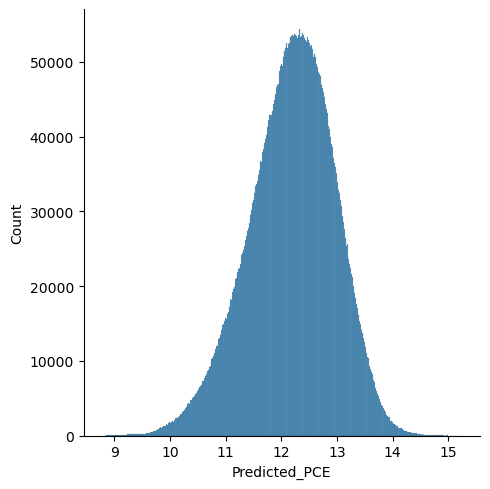

In [19]:
sns.displot(data=dp_pred, x="Predicted_PCE") # distribution of pce

In [20]:
pickle.dump(dp_pred, open(pwd+"/predictions/pce_predictions_depo.pkl","wb")) # saving predicted data

In [21]:
improved_pce = dp_pred[dp_pred["Predicted_PCE"] > 12.24] # screening out data with improved pce
improved_pce.shape # shape of the data with improved pce

(5508977, 30)

In [22]:
improved_pce.sort_values(by="Predicted_PCE", ascending=False).head() # sorting

,Cell_architecture,Cell_flexible,Cell_semitransparent,Substrate_stack_sequence,ETL_stack_sequence,ETL_thickness,ETL_deposition_procedure,Perovskite_dimension_2D,Perovskite_dimension_2D3D_mixture,Perovskite_dimension_3D,Perovskite_dimension_3D_with_2D_capping_layer,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_long_form,Perovskite_thickness,Perovskite_composition_inorganic,Perovskite_band_gap,Perovskite_band_gap_graded,Perovskite_deposition_procedure,Perovskite_deposition_solvents,Perovskite_deposition_quenching_induced_crystallisation,Perovskite_deposition_thermal_annealing_temperature,Perovskite_deposition_thermal_annealing_time,Perovskite_deposition_solvent_annealing,HTL_stack_sequence,HTL_thickness_list,HTL_deposition_procedure,Backcontact_stack_sequence,Backcontact_thickness_list,Backcontact_deposition_procedure,Predicted_PCE
2111604,pin,False,False,SLG | ITO,SnO2-np | CPTA,26.0,Evaporation | Evaporation,False,False,True,False,True,(PEA)BAFA3Sn4I13,350.0,False,1.6,False,Spin-coating >> Spin-coating >> CBD,DMF >> IPA,False,60; 100,2.0; 10.0,False,NiO-c,344.0,Spin-coating | Spin-coating,Cu,100.0,Evaporation,15.247782
1742004,pin,False,False,SLG | ITO,SnO2-np | CPTA,26.0,Evaporation | Evaporation,False,False,True,False,True,(PEA)BAFA3Sn4I13,350.0,False,1.6,False,Spin-coating >> CBD,DMF >> IPA,False,60; 100,2.0; 10.0,False,NiO-c,344.0,Spin-coating | Spin-coating,Cu,100.0,Evaporation,15.247782
2111364,pin,False,False,SLG | ITO,SnO2-np | CPTA,26.0,Evaporation | Evaporation,False,False,True,False,True,(PEA)BAFA3Sn4I13,350.0,False,1.6,False,Spin-coating >> Spin-coating >> CBD,DMF >> IPA,False,60; 100,1.0; 4.0,False,NiO-c,344.0,Spin-coating | Spin-coating,Cu,100.0,Evaporation,15.228935
1741764,pin,False,False,SLG | ITO,SnO2-np | CPTA,26.0,Evaporation | Evaporation,False,False,True,False,True,(PEA)BAFA3Sn4I13,350.0,False,1.6,False,Spin-coating >> CBD,DMF >> IPA,False,60; 100,1.0; 4.0,False,NiO-c,344.0,Spin-coating | Spin-coating,Cu,100.0,Evaporation,15.228935
1733204,pin,False,False,SLG | ITO,SnO2-np | CPTA,26.0,Evaporation | Evaporation,False,False,True,False,True,(PEA)BAFA3Sn4I13,350.0,False,1.6,False,Spin-coating >> CBD,DMF >> IPA,False,60.0; 100.0,2.0; 10.0,False,NiO-c,344.0,Spin-coating | Spin-coating,Cu,100.0,Evaporation,15.204399


In [23]:
pickle.dump(improved_pce, open(pwd+"/predictions/improved_pce_depo.pkl","wb")) # saving data with improved pce

In [24]:
improved_pce.to_csv(pwd+"/predictions/improved_pce_depo.csv",index=False) # saving data with improved pce to csv file